##### Импорт библиотек

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
plt.rcParams["figure.figsize"]=8,6

#### «Балтийский государственный технический университет «ВОЕНМЕХ» им. Д.Ф. Устинова» 

Студент группы А361

Добряков Н.И.

## Приближенный расчет параметров ядерной энергетической установки с встроенным в активную зону термоэмиссионным преобразователем одноэлементной конструкции

### Исходные данные:

In [2]:
P_el = 35*10**3 # Вт - требуемая электрическая мощность ЯЭУ
t = 7            # лет - требуемый ресурс работы ЯЭУ
P = 90           # надежность работы холодильника-излучателя (принимает значение 90 или 99)
d_k = 0.02       # м - диаметр ЭГК
L_k = 0.25       # м - длина ЭГК

B = 5            # дозовый фактор ослабления

delta = 0.06     # м - толщина отражателя
d_z = 0.002      # м - толщина алюминиевого корпуса защиты

ro_t = 19050     # кг/м^3 - плотность диоксида урана
ro_z = 5600      # кг/м^3 - плотность гидрида церкония
ro_otr = 1950    # кг/м^3 - плотность бериллия
ro_izl = 8920    # кг/м^3 - плотность меди
ro_lih = 2900    # кг/м^3 - плотность гидрида лития
ro_pb = 11340    # кг/м^3 - плотность свинца
ro_al = 2800     # кг/м^3 - плотность алюминия

#### Для быстрого перехода к выводу программы используется ссылка: [итоговые данные](#Итоговые-данные:)

### Расчет:

Суммарная поверхность энерговыделяющих катодов $ S_к, см^2,$ определяется по электрической мощности ЯЭУ $P_{эл}, Вт: $

Для выбора $P_{эл}$ и $P_{уд}$ используются эмпирические данные, из соотношений отображенных в графиках. Для определения значений этих параметров за пределами графиков следует пролонгировать исходные соотношения методами эктраполяции:

In [3]:
# Линейная функция зависимости температуры катода от времени ресурса работы ЯЭУ
t_i = np.arange(1,11,1)
k = -125
b = 2150
def T_k_f(z):
    return k*z+b

Отрисуем график зависимости ресурса работы ядерной энергетической установки от температуры катода, и отыщем температуру для искомого ресурса - $T_k(7)$:

T_k(7) = 1275


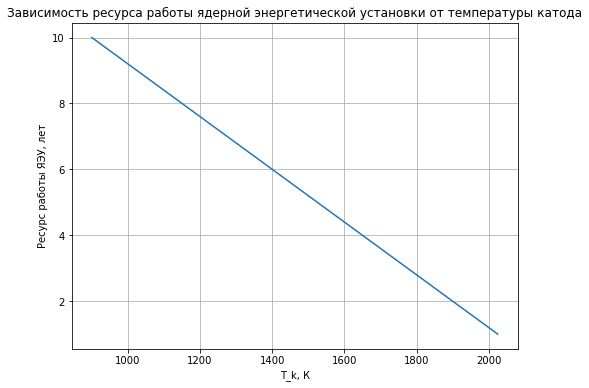

In [4]:
lplot = sns.lineplot(T_k_f(t_i), t_i)

lplot.set_title('Зависимость ресурса работы ядерной энергетической установки от температуры катода')
lplot.set_xlabel('T_k, К')
lplot.set_ylabel('Ресурс работы ЯЭУ, лет')
lplot.grid()
T_k = T_k_f(t)
print(f'T_k({t}) =',T_k)

Далее требуется экстраполировать график зависимости удельного энергосъёма от температуры катода.

In [5]:
# Данные точек из исходного графика.
points = np.arange(1500, 2050, 50, dtype=float)
P_ud_i = np.array([2.08,2.117647,2.195294,2.411764,2.705882,3,3.235294,3.823529,4.294117,4.647058,5.1])
n = points.size

points_long = np.arange(1200, 2050, 50, dtype=float)

In [6]:
# Аппроксимирующая функция.
def func_Pud(x, a, b, c):
    return a+(b)**x*c
popt, pcov = scipy.optimize.curve_fit(func_Pud, points[:-1], P_ud_i[:-1])

P_уд(1275) = 1.5881580772310824


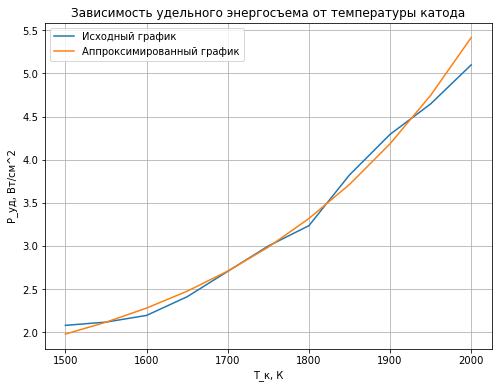

In [7]:
# Построим графики: исходный и аппроксимацию требуемого диапазона значений.
Pud_Tk = sns.lineplot(points, P_ud_i, label='Исходный график', sizes=[1000,2000])
Pud_Tk = sns.lineplot(points, func_Pud(points, *popt), label='Аппроксимированный график', sizes=[1000,2000])
Pud_Tk.set_title('Зависимость удельного энергосъема от температуры катода')
Pud_Tk.set_xlabel('T_к, К')
Pud_Tk.set_ylabel('P_уд, Вт/см^2')
Pud_Tk.grid()

# Отыскание P_уд в искомой точке.
P_ud = func_Pud(T_k, *popt)
print(f'P_уд({T_k}) =', P_ud)

Суммарная поверхность энерговыделяющих катодов.

In [8]:
S_k = (1.2 * P_el)/(P_ud*10000)
S_k

2.644573018400413

Далее необходимо экстраполировать график зависимости КПД ЯЭУ от температуры катода. График имеет форму близкую к прямой, поэтому было принято экстраполировать его линейной функцией.

In [9]:
# Исходный набор данных для оси ординат.
Eta_i = np.array([0.057, 0.067, 0.076, 0.08, 0.088, 0.095, 0.1, 0.105, 0.11, 0.115, 0.118])

Eta_lin(1275) = 0.0348227272727273


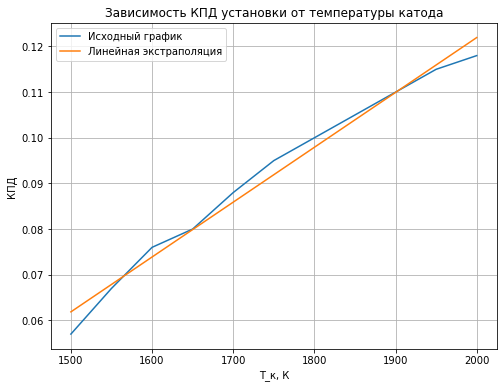

In [10]:
# Экстраполяция с помощью линейной функциии.
res2 = scipy.stats.linregress(points[:], Eta_i[:])
Eta_Tk = sns.lineplot(points, Eta_i, label='Исходный график')
Eta_Tk = sns.lineplot(points, res2.intercept + res2.slope*points, label='Линейная экстраполяция')
Eta_Tk.set_title('Зависимость КПД установки от температуры катода')
Eta_Tk.set_xlabel('Т_к, К')
Eta_Tk.set_ylabel('КПД')
Eta_Tk.grid()
Eta_lin = res2.intercept + res2.slope*T_k

print(f'Eta_lin({T_k}) =', Eta_lin)

Эмиссионная поверхность катода.

In [11]:
S_egk = np.pi * d_k * L_k
S_egk

0.015707963267948967

Число каналов ЭГК.

In [12]:
N_k = S_k / S_egk
N_k = math.ceil(N_k)
N_k

169

Относительный шаг решетки и значение пористости активной зоны.

In [13]:
PSI = 40/20
PSI

2.0

In [14]:
KSI = 1-np.pi/(2*3**(1/2)*PSI**2)
KSI

0.7732750794707228

Диаметр активной зоны.

In [15]:
D_a = np.sqrt((d_k**2*N_k)/(1-KSI))
D_a

0.5460390706205054

Объём активной зоны.

In [16]:
V_a = np.pi*D_a**2*L_k/4
V_a

0.05854331729582808

Длину активной зоны принимаем равной длине ЭГК.

In [17]:
L = L_k

Масса активной зоны. Масса топлива и масса замедлителя.

In [18]:
G_t = N_k*np.pi*d_k**2*L*ro_t/4
G_t

252.8550117149915

In [19]:
G_z = (np.pi*L/4)*(D_a**2-d_k**2*N_k)*ro_z
G_z

253.51249467270276

Масса отражателя.

In [20]:
G_otr = 2*np.pi*(D_a+2*delta)**2/4*delta*ro_otr + np.pi*(D_a+1*delta)*L*delta*ro_otr
G_otr

137.21758343572944

Диаметр реактора.

In [21]:
D_r = D_a + 2*delta
D_r

0.6660390706205054

Масса реактора. Сумма масс топлива, замедлителя, отражателя.

In [22]:
G_r = G_t + G_z + G_otr
G_r

643.5850898234237

Тепловая мощность установки, с учетом электрической мощности и КПД преобразования теплоты в электрическую энергию.

In [23]:
Q_t = (1.2 * P_el) / Eta_lin
Q_t

1206108.863072705

Количество теплоты сбрасываемой с излучателя.

In [24]:
Q_izl = Q_t - 1.2*P_el
Q_izl

1164108.863072705

Площадь поверхности излучателя.

In [25]:
eps = 0.88
sig = 5.67*10**-8
T = 800
F_izl = Q_izl/(eps*sig*T**4)
F_izl

56.95972931670066

Масса излучателя.

Аппроксимация исходных графиков зависимости толщины стенки холодильника-излучателя, в зависимости от площади, времени работы и надежности работы.

In [26]:
# Аппроксимирующая функция.
def func_delt(x, a, b, c):
    return a*x**b+c

In [27]:
# Данные точек из исходных графиков.
delt_i_99 = np.array([2, 2.1, 4,7, 11.5, 16.5])
delt_i_90 = np.array([1, 1.1, 1.5, 4, 7, 11.5])
ft = np.array([10, 100, 1000, 10000, 100000, 1000000])

In [28]:
# Аппроксимация графиков.
popt99, pcov = scipy.optimize.curve_fit(func_delt, ft, delt_i_99)
popt90, pcov = scipy.optimize.curve_fit(func_delt, ft, delt_i_90)
if P == 90: poptP = popt90
if P == 99: poptP = popt99

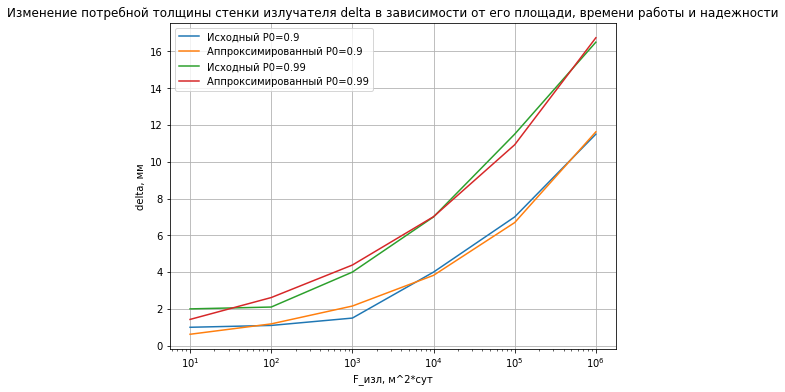

In [29]:
# Вывод графиков.
graph = sns.lineplot(ft, delt_i_90, label='Исходный P0=0.9')
graph = sns.lineplot(ft, func_delt(ft, *popt90), label='Аппроксимированный P0=0.9')
graph = sns.lineplot(ft, delt_i_99, label='Исходный P0=0.99')
graph = sns.lineplot(ft, func_delt(ft, *popt99), label='Аппроксимированный P0=0.99')
graph.set(xscale='log')
graph.set_title('Изменение потребной толщины стенки излучателя delta в зависимости от его площади,\
 времени работы и надежности')
graph.set_xlabel('F_изл, м^2*сут')
graph.set_ylabel('delta, мм')
graph.grid()

Масса и диаметр излучателя

In [30]:
d_izl = func_delt(F_izl*t*365, *poptP)/1000
G_izl = F_izl*d_izl*ro_izl
G_izl, d_izl

(3721.9718633719594, 0.007325551309075341)

Доза стойкости аппаратуры.

In [31]:
Doz_a = 10**14

Площадь активной зоны.

In [32]:
F_az = np.pi*D_a*L_k + 2*np.pi*D_a**2/4
F_az

0.8972046215752192

Доза излучения реактора.

In [33]:
Doz_r = 7.8*(10**8)*Q_t*t*(3600*24*365)/(F_az*10000)
Doz_r

2.31469757426555e+19

Толщина слоя лития.

In [34]:
t_z = -np.log(Doz_a/(B*Doz_r))/0.114
t_z = t_z/100
t_z

1.2247054753458264

Аппроксимация графика зависимости дозового фактора ослабления $В_{(2)}$ от толщины слоя свинца при половинном ослаблении потока излучения.

In [35]:
# Аппроксимирующая функция.
def func_Pbdelt(x, a, b):
    return a*np.log(x)+b

In [36]:
# Данные точек из исходного графика и аппроксимация графика.
B2 = np.array([10,5.72727,3.16667,1.84091,1])
t_pb_i = np.array([0,2,4,6,8])
popt, pcov = scipy.optimize.curve_fit(func_Pbdelt, B2, t_pb_i)

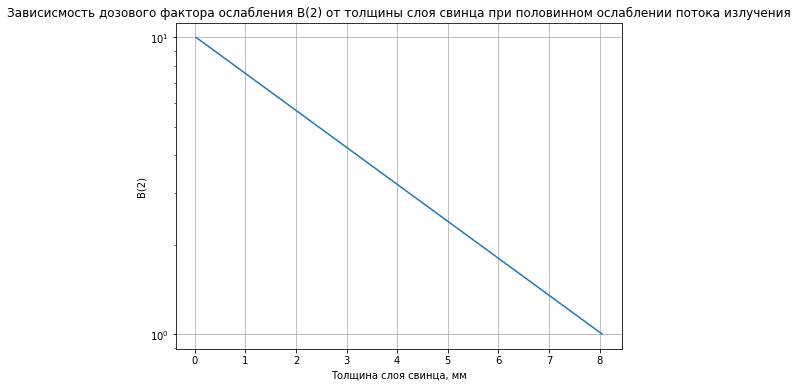

In [37]:
# Вывод графика.
# Pb_delt = sns.lineplot(t_pb_i, B2)
Pb_delt = sns.lineplot(func_Pbdelt(range(11), *popt), range(11))

Pb_delt.set(yscale='log')
Pb_delt.set_title('Зависисмость дозового фактора ослабления В(2) от толщины слоя свинца при\
 половинном ослаблении потока излучения')
Pb_delt.set_xlabel('Толщина слоя свинца, мм')
Pb_delt.set_ylabel('В(2)')
Pb_delt.grid()

In [38]:
# Толщина свинца
t_pb = func_Pbdelt(B, *popt)
if t_pb<0.1: t_pb = 0

t_pb = t_pb/1000
t_pb

0.002441990585002768

Площадь поперечного сечения реактора.

In [39]:
F_r = np.pi*(D_a+2*delta)**2/4
F_r

0.34840894270629824

Объём защиты.

In [40]:
V_z = F_r * t_z
V_z

0.4266983397918538

Масса гидрида лития.

In [41]:
G_lih = V_z * ro_lih
G_lih

1237.425185396376

Объём свинца.

In [42]:
V_pb = F_r * t_pb
V_pb

0.0008508113578195491

Масса свинца.

In [43]:
G_pb = V_pb * ro_pb
G_pb

9.648200797673686

Масса оболочки.

In [44]:
G_ob = 2 * F_r * d_z * ro_al + np.pi * (D_a + 1 *delta) * t_z * ro_al * d_z
G_ob

16.95998527702966

Общая масса реактора-генератора.

In [45]:
G_rg = G_ob + G_lih + G_pb + G_r + G_izl
G_rg

5629.590324666463

### Итоговые данные:

In [46]:
print(f'G_рг = ', G_rg, ' кг - общая масса реактора-генератора\n\n',
     'G_р = ', G_r, ' кг - масса реактора\n',
     'G_защ = ', G_ob + G_lih + G_pb, f' кг - масса защиты, при дозовом факторе ослабления В(2) = {B}\n'
     'G_изл = ', G_izl, f' кг - масса холодильника-излучателя, при P0 = {P}\n\n',
     'D_р = ', D_r, ' м - диаметр реактора\n',
     'N_egk = ', N_k, ' - количество ЭГК\n', sep='')

G_рг = 5629.590324666463 кг - общая масса реактора-генератора

G_р = 643.5850898234237 кг - масса реактора
G_защ = 1264.0333714710796 кг - масса защиты, при дозовом факторе ослабления В(2) = 5
G_изл = 3721.9718633719594 кг - масса холодильника-излучателя, при P0 = 90

D_р = 0.6660390706205054 м - диаметр реактора
N_egk = 169 - количество ЭГК



#### [В начало.](#Приближенный-расчет-параметров-ядерной-энергетической-установки-с-встроенным-в-активную-зону-термоэмиссионным-преобразователем-одноэлементной-конструкции)